Aim:
To enhance data science skills by working on a challenging time-series dataset consisting of daily sales data.

1. Performed Time Series Analysis on data

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

Read CSV files

In [ ]:
sales_train = pd.read_csv('sales_train.csv')
sales_train.shape

(2935849, 6)

In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
shop_item_ngroups = sales_train.groupby(['shop_id', 'item_id']).ngroups
shop_item_ngroups

424124

In [ ]:
print(len(sales_train)/shop_item_ngroups)

6.922147768105554


In [ ]:
shops = pd.read_csv('shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
shop_sales_data = sales_train.merge(shops, on='shop_id', how='right')
shop_sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,12.01.2013,0,0,11059,73.0,1.0,"!Якутск Орджоникидзе, 56 фран"
1,22.01.2013,0,0,11059,73.0,1.0,"!Якутск Орджоникидзе, 56 фран"
2,26.01.2013,0,0,11059,73.0,1.0,"!Якутск Орджоникидзе, 56 фран"
3,12.01.2013,0,0,11347,170.0,1.0,"!Якутск Орджоникидзе, 56 фран"
4,22.01.2013,0,0,11347,170.0,1.0,"!Якутск Орджоникидзе, 56 фран"


In [ ]:
items = pd.read_csv('items.csv')
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
item_shop_sales_data = shop_sales_data.merge(items, on='item_id', how='right')
item_shop_sales_data = item_shop_sales_data.drop(columns=['shop_name', 'item_name'])
item_shop_sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,01.09.2014,20.0,54.0,0,58.0,1.0,40
1,04.04.2014,15.0,55.0,1,4490.0,1.0,76
2,02.04.2014,15.0,55.0,1,4490.0,1.0,76
3,06.07.2014,18.0,55.0,1,4490.0,1.0,76
4,04.08.2014,19.0,55.0,1,4490.0,1.0,76


In [ ]:
combined_sales = item_shop_sales_data.groupby(['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'item_price']).agg({'item_cnt_day':'sum'})
combined_sales.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)
combined_sales = combined_sales.reset_index()
combined_sales

,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_month
0,0.0,0.0,32,40,221.0,6.0
1,0.0,0.0,33,37,347.0,3.0
2,0.0,0.0,35,40,247.0,1.0
3,0.0,0.0,43,40,221.0,1.0
4,0.0,0.0,51,57,127.0,1.0
...,...,...,...,...,...,...
1739017,33.0,59.0,22087,83,119.0,6.0
1739018,33.0,59.0,22088,83,119.0,2.0
1739019,33.0,59.0,22091,83,179.0,1.0
1739020,33.0,59.0,22100,42,629.0,1.0


***----------------------------------------Regression model for Prediction--------------------------------------------***

In [ ]:
test = pd.read_csv('test.csv')
test = test.drop(columns='ID')
test.head()

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [ ]:
import numpy as np

next_pred_month_block = np.max(combined_sales['date_block_num']) + 1
dt_block_num = np.zeros(len(test)) + next_pred_month_block

test['date_block_num'] = dt_block_num
test

,shop_id,item_id,date_block_num
0,5,5037,34.0
1,5,5320,34.0
2,5,5233,34.0
3,5,5232,34.0
4,5,5268,34.0
...,...,...,...
214195,45,18454,34.0
214196,45,16188,34.0
214197,45,15757,34.0
214198,45,19648,34.0


In [ ]:
X_test = test[['date_block_num','shop_id','item_id']]

In [ ]:
train_variables = combined_sales[['date_block_num','shop_id','item_id']]
train_target = combined_sales['item_cnt_month']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_variables , train_target, random_state = 30, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators= 30, max_depth=20, criterion='squared_error').fit(X_train , y_train)

y_pred_valid = rfr.predict(X_valid)
print('MSE = {0:.4f}'.format(mean_squared_error(y_valid , y_pred_valid)))

MSE = 37.7407


In [ ]:
y_pred = rfr.predict(X_test)
y_pred

array([1.03964826, 1.48681113, 1.32475616, ..., 1.27992994, 1.10975259,
       1.00238095])

In [ ]:
submission_csv = pd.read_csv('sample_submission.csv')
submission_csv = submission_csv.drop(columns=['item_cnt_month'])
submission_csv['item_cnt_month'] = np.round(y_pred, 2)
submission_csv

,ID,item_cnt_month
0,0,1.04
1,1,1.49
2,2,1.32
3,3,1.35
4,4,1.09
...,...,...
214195,214195,1.47
214196,214196,1.51
214197,214197,1.28
214198,214198,1.11


***---------------------------------------------End of Regression model----------------------------------------------------------***

***----------------------------------------------Start of time series analysis-------------------------------------------***

In [ ]:
sales_train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

date column is of datatype object, Let's convert it to datetime

In [ ]:
import datetime

sales_train['date'] = sales_train['date'].apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))
print(sales_train['date'])

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]


In [ ]:
sales_train['month'] = sales_train['date'].dt.to_period('M')
print(sales_train['month'])

0          2013-01
1          2013-01
2          2013-01
3          2013-01
4          2013-01
            ...   
2935844    2015-10
2935845    2015-10
2935846    2015-10
2935847    2015-10
2935848    2015-10
Name: month, Length: 2935849, dtype: period[M]


In [ ]:
sales_train['month'] = pd.to_datetime(sales_train['month'].astype(str))
sales_train['month']

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
2935844   2015-10-01
2935845   2015-10-01
2935846   2015-10-01
2935847   2015-10-01
2935848   2015-10-01
Name: month, Length: 2935849, dtype: datetime64[ns]

In [ ]:
monthly_sales_train = sales_train.groupby(['month']).agg({'item_cnt_day':'sum'})
print(monthly_sales_train)

            item_cnt_day
month                   
2013-01-01      131479.0
2013-02-01      128090.0
2013-03-01      147142.0
2013-04-01      107190.0
2013-05-01      106970.0
2013-06-01      125381.0
2013-07-01      116966.0
2013-08-01      125291.0
2013-09-01      133332.0
2013-10-01      127541.0
2013-11-01      130009.0
2013-12-01      183342.0
2014-01-01      116899.0
2014-02-01      109687.0
2014-03-01      115297.0
2014-04-01       96556.0
2014-05-01       97790.0
2014-06-01       97429.0
2014-07-01       91280.0
2014-08-01      102721.0
2014-09-01       99208.0
2014-10-01      107422.0
2014-11-01      117845.0
2014-12-01      168755.0
2015-01-01      110971.0
2015-02-01       84198.0
2015-03-01       82014.0
2015-04-01       77827.0
2015-05-01       72295.0
2015-06-01       64114.0
2015-07-01       63187.0
2015-08-01       66079.0
2015-09-01       72843.0
2015-10-01       71056.0


In [ ]:
monthly_sales_train.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)
monthly_sales_train.head()

,item_cnt_month
month,
2013-01-01,131479.0
2013-02-01,128090.0
2013-03-01,147142.0
2013-04-01,107190.0
2013-05-01,106970.0


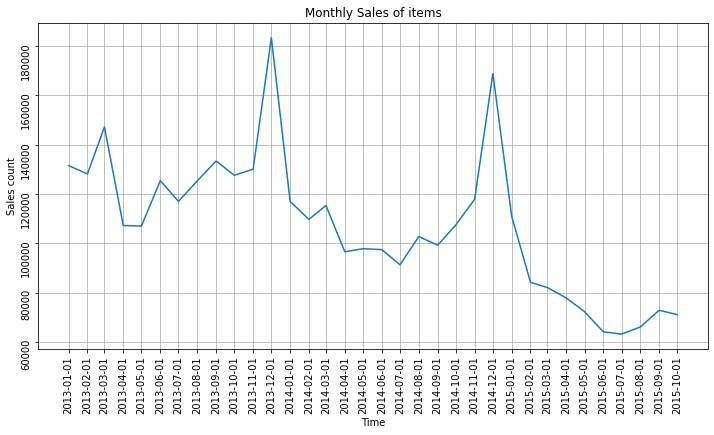

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
plt.plot(monthly_sales_train['item_cnt_month'])
plt.xticks(monthly_sales_train.index)
plt.tick_params(labelrotation=90)
plt.title('Monthly Sales of items')
plt.xlabel('Time')
plt.ylabel('Sales count')
plt.grid()
plt.show()

An **autocorrelation plot** is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other

Autocorrelation = 0.664


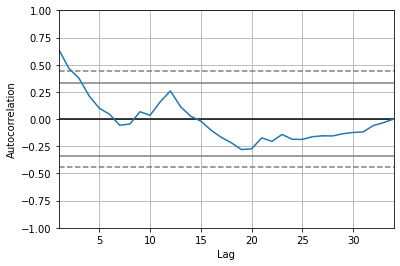

In [ ]:
pd.plotting.autocorrelation_plot(monthly_sales_train['item_cnt_month'])
print('Autocorrelation =', round(monthly_sales_train['item_cnt_month'].autocorr(), 3))

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


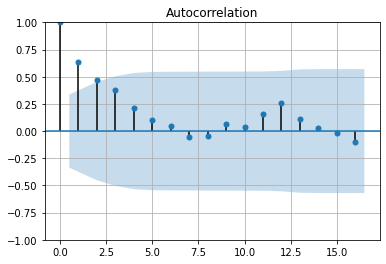

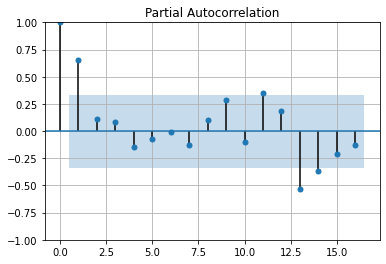

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_sales_train['item_cnt_month'])
plt.grid()
plot_pacf(monthly_sales_train['item_cnt_month'])
plt.grid()
plt.show()

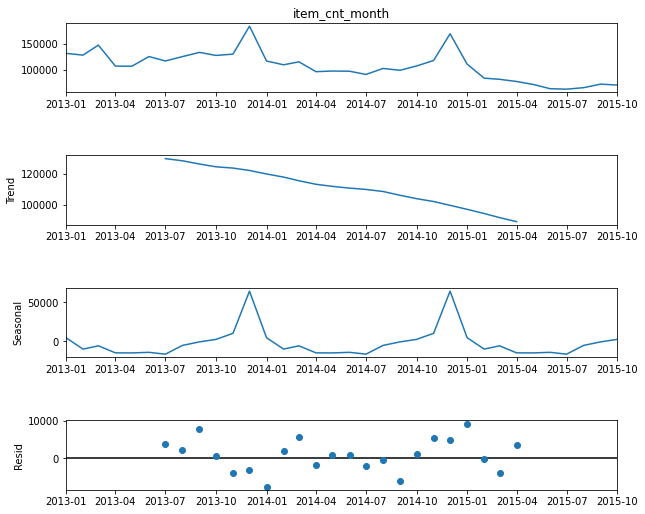

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(monthly_sales_train['item_cnt_month'], model = 'additive').plot().set_size_inches(10, 8)

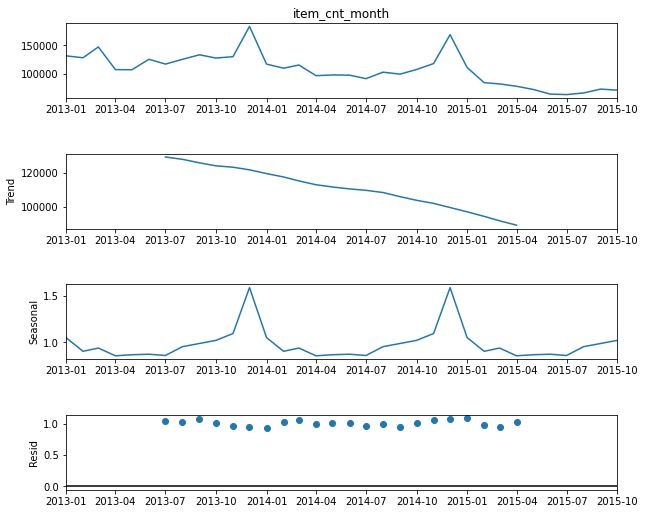

In [ ]:
seasonal_decompose(monthly_sales_train['item_cnt_month'], model = 'multiplicative').plot().set_size_inches(10, 8)

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(monthly_sales_train['item_cnt_month'])
adf

(-2.3957040669944325,
 0.1429525769929046,
 0,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 530.9537360897348)

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
def order_parameters(training_data):
    
    search_params = auto_arima(training_data, start_p = 0, start_q = 0, m = 12, seasonal = True, test = "adf", d = None, trace = True, alpha = 0.05, information_criterion = 'aic', suppress_warnings = True, 
                    stepwise = True)
 
    print("AIC = ", round(search_params.aic(), 2))
                  
    return search_params

In [ ]:
model = order_parameters(monthly_sales_train['item_cnt_month'])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=448.765, Time=0.37 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=451.736, Time=0.06 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=449.440, Time=0.09 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=438.095, Time=0.18 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=439.392, Time=0.26 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=inf, Time=1.29 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=438.173, Time=0.33 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=440.703, Time=1.07 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=448.622, Time=0.13 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=451.418, Time=0.13 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=449.122, Time=0.09 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,2,1)(0,1,1)[12] intercept   : AIC=inf, T

In [ ]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   34
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -216.048
Date:                            Thu, 01 Sep 2022   AIC                            438.095
Time:                                    15:02:37   BIC                            441.082
Sample:                                01-01-2013   HQIC                           438.678
                                     - 10-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9856      0.298     -3.311      0.001      -1.569      -0.402
ma.S.L12      -0.0853      0.168   

In [ ]:
prediction, confint = model.predict(n_periods = 6, return_conf_int = True) #95% CI default
df_confint = pd.DataFrame(confint)
print(confint.round(2))
print(prediction.round(2))

[[ 49454.95 106326.13]
 [ 84822.5  166627.74]
 [ 14725.65 116582.4 ]
 [-22076.08  97438.41]
 [-34511.53 101209.37]
 [-50584.33 100364.26]]
2015-11-01     77890.54
2015-12-01    125725.12
2016-01-01     65654.02
2016-02-01     37681.17
2016-03-01     33348.92
2016-04-01     24889.97
Freq: MS, dtype: float64


In [ ]:
period_index = pd.period_range(start = monthly_sales_train.index[-1], periods = 7, freq='M')
period_index = period_index[1:]
period_index

PeriodIndex(['2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04'], dtype='period[M]')

In [ ]:
df_predict = pd.DataFrame(index = period_index)
df_predict.index.name = 'month'
df_predict['item_cnt_month'] = prediction.round(2).values
df_predict = df_predict.to_timestamp()
df_predict

,item_cnt_month
month,
2015-11-01,77890.54
2015-12-01,125725.12
2016-01-01,65654.02
2016-02-01,37681.17
2016-03-01,33348.92
2016-04-01,24889.97


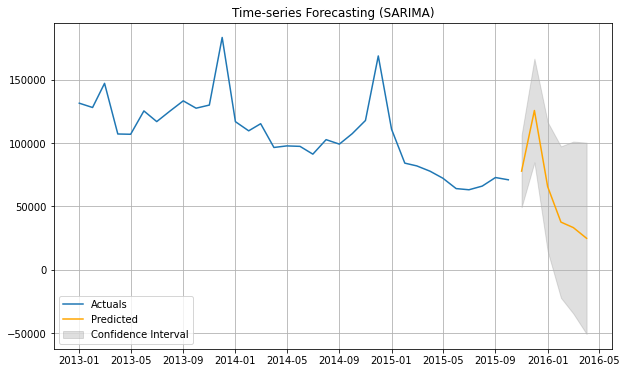

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(monthly_sales_train['item_cnt_month'], label = 'Actuals')
plt.plot(df_predict, color = 'orange', label = 'Predicted')
plt.fill_between(period_index.to_timestamp(), df_confint[0], df_confint[1], color = 'grey', alpha = 0.25, label = 'Confidence Interval')
plt.legend(loc = 'lower left')
plt.title('Time-series Forecasting (SARIMA)')
plt.grid()
plt.show()

In [ ]:
final_df = pd.concat([monthly_sales_train, df_predict])

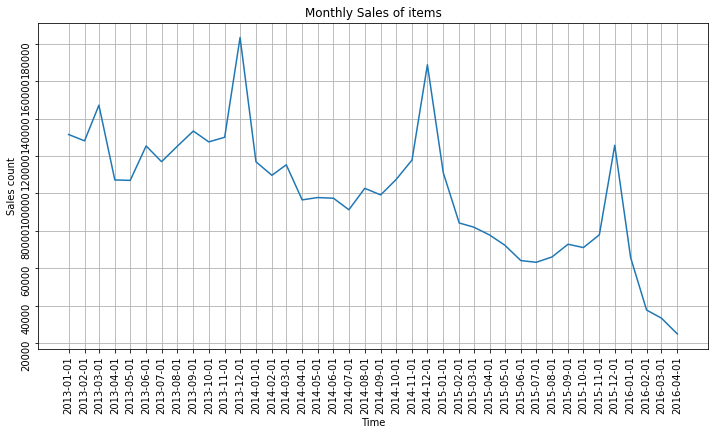

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(final_df['item_cnt_month'])
plt.xticks(final_df.index)
plt.tick_params(labelrotation=90)
plt.title('Monthly Sales of items')
plt.xlabel('Time')
plt.ylabel('Sales count')
plt.grid()
plt.show()

***----------------------------End of Time Series Analysis-------------------------------***

In [ ]:
test = pd.read_csv('test.csv')
test.shape

(214200, 3)

In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
